<a href="https://colab.research.google.com/github/mateus-bonette00/Panorama-do-COVID-19-no-Brasil/blob/main/Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Panorama do COVID-19 no *Brasil*

*by [Mateus Bonette](https://www.linkedin.com/in/mateus-bonette/) Março 12, 2024*

---

A pandemia de COVID-19, causada pelo coronavírus SARS-CoV-2, emergiu como um dos desafios mais significativos enfrentados pela humanidade neste século. Desde sua identificação inicial na cidade de Wuhan, China, em dezembro de 2019, o vírus se espalhou rapidamente pelo mundo, resultando em milhões de casos confirmados e centenas de milhares de mortes.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="65%" src="https://www2.ufjf.br/progepe/wp-content/uploads/sites/28/2020/03/Covid-19-1024x576.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

## Obtenção dos Dados do Covid-19

Nosso conjunto completo de dados sobre COVID-19 é uma coleção de dados sobre COVID-19 mantidos por [*Our World in Data*](https://ourworldindata.org/coronavirus). E como iremos usar esses dados no formato `csv`, vamos importar tudo deste [link]([https://github.com/owid/covid-19-data/tree/master/public/data). E usaremos o arquivo [``owid-covid-data.csv``](https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv).

Essa fonte é um repositório de dados sobre o coronavírus, que fornece informações detalhadas e atualizadas sobre vários aspectos da pandemia. Ela é organizada de forma a apresentar estatísticas e análises sobre a propagação do vírus, o impacto nas diferentes regiões do mundo, medidas de contenção adotadas pelos governos, bem como dados sobre vacinação e saúde pública relacionados à COVID-19.

A análise de uma nova doença como o COVID-19 apresenta desafios significativos. A falta de informações completas e precisas no início pode complicar a compreensão de sua natureza e impacto.

Além disso, os dados coletados e divulgados por diferentes entidades governamentais e não oficiais podem variar, gerando conflitos e desconfiança na interpretação dos números.

Essas disparidades muitas vezes refletem diferenças metodológicas na coleta e no relato de dados, bem como agendas políticas e interesses divergentes. Lidar com essas complexidades exige transparência, cooperação e uma abordagem baseada em evidências para entender melhor a propagação da doença e desenvolver estratégias eficazes de prevenção e controle.

In [ ]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# importar o dataset COVID-19 para um DataaFrame
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

### Dicionário de Variáveis

Esse arquivo *csv* possui 67 colunas, que são elas:

* `iso_code` - Refere-se aos códigos de países de três letras definidos pelo padrão ISO 3166-1. Este padrão é mantido pela Organização Internacional para Padronização (ISO) e é utilizado para representar países e territórios em várias aplicações.

* `continent` - Continente da localização geográfica.
* `location` - Localização geográfica.
* `date` - Data de observação.
* `total_cases` - Total de casos confirmados de COVID-19. As contagens podem incluir casos prováveis, quando notificados.
* `new_cases` - Novos casos confirmados de COVID-19. As contagens podem incluir casos prováveis, quando notificados. Nos raros casos em que a nossa fonte reporta uma alteração diária negativa devido a uma correção de dados, definimos esta métrica como NA.
* `new_cases_smoothed` - Novos casos confirmados de COVID-19 (suavizado em 7 dias). As contagens podem incluir casos prováveis, quando notificados.
* `total_deaths` - Total de mortes atribuídas à COVID-19. As contagens podem incluir mortes prováveis, quando relatadas.
* `new_deaths` - Novas mortes atribuídas à COVID-19. As contagens podem incluir mortes prováveis, quando relatadas. Nos raros casos em que a nossa fonte reporta uma alteração diária negativa devido a uma correção de dados, definimos esta métrica como NA.
* `new_deaths_smoothed` - Novas mortes atribuídas à COVID-19 (suavizado em 7 dias). As contagens podem incluir mortes prováveis, quando relatadas.
* `total_cases_per_million` - Total de casos confirmados de COVID-19 por 1.000.000 de pessoas. As contagens podem incluir casos prováveis, quando notificados.
* `new_cases_per_million` - Novos casos confirmados de COVID-19 por 1.000.000 de pessoas. As contagens podem incluir casos prováveis, quando notificados.
* `new_cases_smoothed_per_million` - Novos casos confirmados de COVID-19 (suavizado em 7 dias) por 1.000.000 de pessoas. As contagens podem incluir casos prováveis, quando notificados.
* `total_deaths_per_million` - Total de mortes atribuídas à COVID-19 por 1.000.000 de pessoas. As contagens podem incluir mortes prováveis, quando relatadas.
* `new_deaths_per_million` - Novas mortes atribuídas à COVID-19 por 1.000.000 de pessoas. As contagens podem incluir mortes prováveis, quando relatadas.
* `new_deaths_smoothed_per_million` - Novas mortes atribuídas à COVID-19 (suavizado em 7 dias) por 1.000.000 de pessoas. As contagens podem incluir mortes prováveis, quando relatadas.
* `reproduction_rate` - Estimativa em tempo real da taxa efetiva de reprodução (R) do COVID-19. Consulte https://github.com/crondonm/TrackingR/tree/main/Estimates-Database.
* `icu_patients` - Número de pacientes com COVID-19 em unidades de terapia intensiva (UTI) em um determinado dia.
* `icu_patients_per_million` - Número de pacientes com COVID-19 em unidades de terapia intensiva (UTI) em um determinado dia por 1.000.000 de pessoas.
* `hosp_patients` - Número de pacientes com COVID-19 hospitalizados em um determinado dia
* `hosp_patients_per_million` - Número de pacientes com COVID-19 hospitalizados em um determinado dia por 1.000.000 de pessoas
* `weekly_icu_admissions` - Número de pacientes com COVID-19 recém-admitidos em unidades de terapia intensiva (UTI) em uma determinada semana (data do relatório e 6 dias anteriores)
* `weekly_icu_admissions_per_million` - Número de pacientes com COVID-19 recém-admitidos em unidades de terapia intensiva (UTI) em uma determinada semana por 1.000.000 de pessoas (data do relatório e 6 dias anteriores).
* `weekly_hosp_admissions` - Número de pacientes com COVID-19 recentemente internados em hospitais em uma determinada semana (data do relatório e 6 dias anteriores)
* `weekly_hosp_admissions_per_million` - Número de pacientes com COVID-19 recém-internados em hospitais em uma determinada semana por 1.000.000 de pessoas (data do relatório e 6 dias anteriores)
* `total_tests` - Total de testes para COVID-19
* `new_tests` - Novos testes para COVID-19 (calculados apenas para dias consecutivos)
* `total_tests_per_thousand` - Total de testes para COVID-19 por 1.000 pessoas
* `new_tests_per_thousand` - Novos testes para COVID-19 por cada 1.000 pessoas
* `new_tests_smoothed` -  Novos testes para COVID-19 (suavizado em 7 dias). Para os países que não comunicam dados de testes diariamente, assumimos que os testes mudaram igualmente diariamente durante quaisquer períodos em que não foram comunicados dados. Isso produz uma série completa de números diários, cuja média é então calculada ao longo de uma janela contínua de 7 dias.
* `new_tests_smoothed_per_thousand` - Novos testes para COVID-19 (suavizado em 7 dias) por 1.000 pessoas
* `positive_rate` - A proporção de testes de COVID-19 positivos, dada como uma média móvel de 7 dias (este é o inverso de testes_por_caso)
* `tests_per_case` - Testes realizados por novo caso confirmado de COVID-19, dados como uma média móvel de 7 dias (este é o inverso da taxa_positiva)
* `tests_units` - Unidades usadas pelo local para relatar seus dados de teste. Um arquivo de país não pode conter unidades mistas. Todas as métricas relativas aos dados de teste usam a unidade de teste especificada. As unidades válidas são 'pessoas testadas' (número de pessoas testadas), 'testes realizados' (número de testes realizados. uma única pessoa pode ser testada mais de uma vez em um determinado dia) e 'amostras testadas' (número de amostras testadas. Em alguns casos, mais de uma amostra pode ser necessária para realizar um determinado teste.)
* `total_vaccinations` - Número total de doses de vacinação contra a COVID-19 administradas
* `people_vaccinated` - Número total de pessoas que receberam pelo menos uma dose da vacin
* `people_fully_vaccinated` - Número total de pessoas que receberam todas as doses prescritas pelo protocolo vacinal inicial
* `total_boosters` - Número total de doses de reforço da vacinação contra a COVID-19 administradas (doses administradas além do número prescrito pelo protocolo de vacinação)
* `new_vaccinations` - Novas doses de vacinação contra a COVID-19 administradas (calculadas apenas para dias consecutivos)
* `new_vaccinations_smoothed` - Novas doses de vacinação contra a COVID-19 administradas (suavização de 7 dias). Para os países que não comunicam dados de vacinação diariamente, assumimos que a vacinação mudou igualmente diariamente durante quaisquer períodos em que não foram comunicados dados. Isso produz uma série completa de números diários, cuja média é então calculada ao longo de uma janela contínua de 7 dias.
* `total_vaccinations_per_hundred` - Número total de doses de vacinação contra a COVID-19 administradas por 100 pessoas na população total
* `people_vaccinated_per_hundred` - Número total de pessoas que receberam pelo menos uma dose de vacina por 100 pessoas na população total
* `people_fully_vaccinated_per_hundred` - Número total de pessoas que receberam todas as doses prescritas pelo protocolo inicial de vacinação por 100 pessoas na população total
* `total_boosters_per_hundred` - Número total de doses de reforço da vacinação contra a COVID-19 administradas por 100 pessoas na população total
* `new_vaccinations_smoothed_per_million` - Novas doses de vacinação contra a COVID-19 administradas (suavização de 7 dias) por 1.000.000 de pessoas na população total
* `new_people_vaccinated_smoothed` - Número diário de pessoas que recebem a primeira dose da vacina (ajustado por 7 dias)
* `new_people_vaccinated_smoothed_per_hundred` - Número diário de pessoas que recebem a primeira dose da vacina (suavizado em 7 dias) por 100 pessoas na população total
* `stringency_index` - Índice de rigor da resposta do governo: medida composta baseada em 9 indicadores de resposta, incluindo encerramento de escolas, encerramento de locais de trabalho e proibições de viagens, redimensionado para um valor de 0 a 100 (100 = resposta mais rigorosa)
* `population_density` - Número de pessoas dividido por área territorial, medido em quilômetros quadrados, ano mais recente disponível
* `median_age` - Idade média da população, projeção da ONU para 2020
* `aged_65_older` - Percentagem da população com 65 anos ou mais, ano mais recente disponível
* `aged_70_older` - Percentagem da população com 70 anos ou mais em 2015
* `gdp_per_capita` - Produto interno bruto em paridade de poder de compra (dólares internacionais constantes de 2011), ano mais recente disponível
* `extreme_poverty` - Percentagem da população que vive em pobreza extrema, último ano disponível desde 2010
* `cardiovasc_death_rate` - Taxa de mortalidade por doenças cardiovasculares em 2017 (número anual de mortes por 100.000 pessoas)
* `diabetes_prevalence` - Prevalência de diabetes (% da população entre 20 e 79 anos) em 2017
* `female_smokers` - Percentagem de mulheres que fumam, ano mais recente disponível
* `male_smokers` - Percentagem de homens que fumam, ano mais recente disponível
* `handwashing_facilities` - Percentagem da população com instalações básicas para lavagem das mãos nas instalações, ano mais recente disponível
* `hospital_beds_per_thousand` - Leitos hospitalares por 1.000 pessoas, último ano disponível desde 2010
* `life_expectancy` - Expectativa de vida ao nascer em 2019
* `human_development_index` - Um índice composto que mede o desempenho médio em três dimensões básicas do desenvolvimento humano – uma vida longa e saudável, conhecimento e um nível de vida digno. Valores para 2019, importados de http://hdr.undp.org/en/indicators/137506.
* `population` - População (últimos valores disponíveis). Consulte https://github.com/owid/covid-19-data/blob/master/scripts/input/un/population_latest.csv para obter a lista completa de fontes.
* `excess_mortality_cumulative_absolute` - Diferença acumulada entre o número de mortes notificado desde 1 de janeiro de 2020 e o número de mortes projetado para o mesmo período com base em anos anteriores. Para obter mais informações, consulte https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality.
* `excess_mortality_cumulative` - Diferença percentual entre o número acumulado de mortes desde 1 de janeiro de 2020 e as mortes cumulativas projetadas para o mesmo período com base em anos anteriores. Para obter mais informações, consulte https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality.
* `excess_mortality` - Diferença percentual entre o número relatado de mortes semanais ou mensais em 2020–2021 e o número projetado de mortes para o mesmo período com base em anos anteriores. Para obter mais informações, consulte https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality.
* `excess_mortality_cumulative_per_million` - Diferença acumulada entre o número de mortes comunicado desde 1 de janeiro de 2020 e o número de mortes projetado para o mesmo período com base em anos anteriores, por milhão de pessoas. Para obter mais informações, consulte https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality.

## Análise Exploratória dos Dados do Covid-19

Agora iremos fazer a Análise Exploratória dos Dados do Covid-19.

O objetivo principal da Análise Exploratória de Dados é responder a perguntas iniciais sobre os dados, identificar padrões, anomalias, tendências e relações entre as variáveis. Isso é feito por meio de gráficos, estatísticas descritivas, técnicas de visualização e, às vezes, por meio de abordagens mais avançadas, como análise de componentes principais ou clusterização.

Além disso, durante a análise, os dados são preparados para análises subsequentes, o que pode incluir limpeza de dados, tratamento de valores ausentes, normalização ou transformação de variáveis, e detecção de outliers entre outras técnicas.

Como ja importamos as bibliotecas necessárias e o dataset COVID-19 para um DataaFrame, vamos visualizar as 5 primeiras entradas.

In [ ]:
# verficando as 5 primeiras entradas do DataFrame
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


Parte importante para a nossa análise, é descobrir o tamanho do dataset que estamos trabalhando, para que podemos ver a quantidade de variáveis e entradas que este dataset possui.

O conjunto de dados possui 380519 linhas e 67 colunas, como você pode ver abaixo.

In [ ]:
# verificando as dimensões
print('Dimensões do Dataset',
    '\nVariáveis: ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])

Dimensões do Dataset 
Variáveis:  67 
Entradas:  383729


In [ ]:
# extrair os nomes das colunas
nomes_colunas = df.columns.tolist()

print(' \n'.join([f'* `{coluna}` - ' for coluna in nomes_colunas]))

* `iso_code` -  
* `continent` -  
* `location` -  
* `date` -  
* `total_cases` -  
* `new_cases` -  
* `new_cases_smoothed` -  
* `total_deaths` -  
* `new_deaths` -  
* `new_deaths_smoothed` -  
* `total_cases_per_million` -  
* `new_cases_per_million` -  
* `new_cases_smoothed_per_million` -  
* `total_deaths_per_million` -  
* `new_deaths_per_million` -  
* `new_deaths_smoothed_per_million` -  
* `reproduction_rate` -  
* `icu_patients` -  
* `icu_patients_per_million` -  
* `hosp_patients` -  
* `hosp_patients_per_million` -  
* `weekly_icu_admissions` -  
* `weekly_icu_admissions_per_million` -  
* `weekly_hosp_admissions` -  
* `weekly_hosp_admissions_per_million` -  
* `total_tests` -  
* `new_tests` -  
* `total_tests_per_thousand` -  
* `new_tests_per_thousand` -  
* `new_tests_smoothed` -  
* `new_tests_smoothed_per_thousand` -  
* `positive_rate` -  
* `tests_per_case` -  
* `tests_units` -  
* `total_vaccinations` -  
* `people_vaccinated` -  
* `people_fully_vaccinated` 

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possivel ver que as colunas ``weekly_icu_admissions_per_million``, ``weekly_icu_admissions``, ``excess_mortality_cumulative_per_million``, ``excess_mortality``, ``excess_mortality_cumulative`` possuem quase 100% de valores nulos.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
round((df.isnull().sum() / df.shape[0]).sort_values(ascending=False),2)

weekly_icu_admissions_per_million          0.97
weekly_icu_admissions                      0.97
excess_mortality_cumulative_per_million    0.97
excess_mortality                           0.97
excess_mortality_cumulative                0.97
                                           ... 
new_deaths_per_million                     0.03
population                                 0.00
date                                       0.00
location                                   0.00
iso_code                                   0.00
Length: 67, dtype: float64

Outro detalhe importante que precisamos verificar e garantir que estão da forma que precisamos é o tipo das variáveis. Para isso, utilizaremos o método `dtypes`.

In [ ]:
# verificando o tipo das variáveis
df.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

Como vimos ao analisar os tipos das váriaveis, verificamos que a coluna `date` não está em formato datetime. Para que possamos explorar essa variável ao máximo, vamos transformá-la para o formato datetime.

In [ ]:
# tranformar a coluna data em datetime
df.date = pd.to_datetime(df.date)

Agora com a coluna `date` está no formato datetime, vamos verificar qual a data mais recente do nosso dataset.

In [ ]:
# verificando a data mais recente do dataset
df.date.max()

Timestamp('2024-03-14 00:00:00')

Como temos a data mais recente presente nesse dataset, vamos ver até essa data atual, quais são os países que mais possuem casos e mortes do covid-19.

In [ ]:
# total de casos
df.loc[df.date == '2024-03-11'].sort_values(by='total_cases', ascending=False)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
18251,ABW,North America,Aruba,2024-03-11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,76.29,NaN,1.064590e+05,NaN,NaN,NaN,NaN
19780,OWID_ASI,NaN,Asia,2024-03-11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.721383e+09,NaN,NaN,NaN,NaN
28911,BGD,Asia,Bangladesh,2024-03-11,NaN,NaN,NaN,NaN,NaN,NaN,...,44.700,34.808,0.800,72.59,0.632,1.711864e+08,NaN,NaN,NaN,NaN
51721,BGR,Europe,Bulgaria,2024-03-11,NaN,NaN,NaN,NaN,NaN,NaN,...,44.400,NaN,7.454,75.05,0.816,6.781955e+06,NaN,NaN,NaN,NaN
59332,CAN,North America,Canada,2024-03-11,NaN,NaN,NaN,NaN,NaN,NaN,...,16.600,NaN,2.500,82.43,0.929,3.845433e+07,NaN,NaN,NaN,NaN
85187,CZE,Europe,Czechia,2024-03-11,NaN,NaN,NaN,NaN,NaN,NaN,...,38.300,NaN,6.630,79.38,0.900,1.049399e+07,NaN,NaN,NaN,NaN
107837,OWID_EUR,NaN,Europe,2024-03-11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.448078e+08,NaN,NaN,NaN,NaN
109368,OWID_EUN,NaN,European Union,2024-03-11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.501468e+08,NaN,NaN,NaN,NaN
130659,GRC,Europe,Greece,2024-03-11,NaN,NaN,NaN,NaN,NaN,NaN,...,52.000,NaN,4.210,82.24,0.888,1.038497e+07,NaN,NaN,NaN,NaN
147389,OWID_HIC,NaN,High income,2024-03-11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.250515e+09,NaN,NaN,NaN,NaN


In [ ]:
# total de morte
df.loc[df.date == '2024-03-11'].sort_values(by='total_deaths', ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
18251,ABW,North America,Aruba,2024-03-11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,76.29,NaN,1.064590e+05,NaN,NaN,NaN,NaN
19780,OWID_ASI,NaN,Asia,2024-03-11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.721383e+09,NaN,NaN,NaN,NaN
28911,BGD,Asia,Bangladesh,2024-03-11,NaN,NaN,NaN,NaN,NaN,NaN,...,44.700,34.808,0.800,72.59,0.632,1.711864e+08,NaN,NaN,NaN,NaN
51721,BGR,Europe,Bulgaria,2024-03-11,NaN,NaN,NaN,NaN,NaN,NaN,...,44.400,NaN,7.454,75.05,0.816,6.781955e+06,NaN,NaN,NaN,NaN
59332,CAN,North America,Canada,2024-03-11,NaN,NaN,NaN,NaN,NaN,NaN,...,16.600,NaN,2.500,82.43,0.929,3.845433e+07,NaN,NaN,NaN,NaN
85187,CZE,Europe,Czechia,2024-03-11,NaN,NaN,NaN,NaN,NaN,NaN,...,38.300,NaN,6.630,79.38,0.900,1.049399e+07,NaN,NaN,NaN,NaN
107837,OWID_EUR,NaN,Europe,2024-03-11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.448078e+08,NaN,NaN,NaN,NaN
109368,OWID_EUN,NaN,European Union,2024-03-11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.501468e+08,NaN,NaN,NaN,NaN
130659,GRC,Europe,Greece,2024-03-11,NaN,NaN,NaN,NaN,NaN,NaN,...,52.000,NaN,4.210,82.24,0.888,1.038497e+07,NaN,NaN,NaN,NaN
147389,OWID_HIC,NaN,High income,2024-03-11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.250515e+09,NaN,NaN,NaN,NaN


Como podemos observar acima nas datas mais recentes as colunas `total_cases` e `total_deaths` possuem valores ausentes, e para podermos trabalhar com essas variáveis e descobrir quais são os países que mais possuem casos e mortes, iremos "remover" esses valores ausentes presentes nessas colunas.

In [ ]:
# removendo os valores ausentes presentes nas colucas total_cases e total_deaths
df_new = df.dropna(subset=['total_cases', 'total_deaths'])


Com esses valores ausentes, vamos verificar novamente qual é a data mais recente sem valor ausente do nosso dataset.

In [ ]:
# verificando a data mais recente do dataset
df_new.date.max()

Timestamp('2024-03-03 00:00:00')

Visto que a data mais recente com valores presentes nas colunas `total_cases` e `total_deaths` é `2024-02-18`, vamos agora ver quais são os países com mais casos e mortes.

In [ ]:
# total de casos
df_new.loc[df.date == '2024-02-18'].sort_values(by='total_cases', ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
379143,OWID_WRL,NaN,World,2024-02-18,774702200.0,75841.0,10834.429,7034499.0,1669.0,238.429,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
147367,OWID_HIC,NaN,High income,2024-02-18,428258309.0,36219.0,5174.143,2975017.0,1571.0,224.429,...,NaN,NaN,NaN,NaN,NaN,1.250515e+09,NaN,NaN,NaN,NaN
19758,OWID_ASI,NaN,Asia,2024-02-18,301347256.0,7986.0,1140.857,1636670.0,49.0,7.000,...,NaN,NaN,NaN,NaN,NaN,4.721383e+09,NaN,NaN,NaN,NaN
107815,OWID_EUR,NaN,Europe,2024-02-18,252252832.0,41966.0,5995.143,2098594.0,181.0,25.857,...,NaN,NaN,NaN,NaN,NaN,7.448078e+08,NaN,NaN,NaN,NaN
365773,OWID_UMC,NaN,Upper middle income,2024-02-18,245387262.0,36921.0,5274.429,2666192.0,71.0,10.143,...,NaN,NaN,NaN,NaN,NaN,2.525921e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12145,AIA,North America,Anguilla,2024-02-18,3904.0,0.0,0.000,12.0,0.0,0.000,...,NaN,NaN,NaN,81.88,NaN,1.587700e+04,NaN,NaN,NaN,NaN
377622,WLF,Oceania,Wallis and Futuna,2024-02-18,3550.0,0.0,0.000,8.0,0.0,0.000,...,NaN,NaN,NaN,79.94,NaN,1.159600e+04,NaN,NaN,NaN,NaN
293184,SPM,North America,Saint Pierre and Miquelon,2024-02-18,3426.0,0.0,0.000,2.0,0.0,0.000,...,NaN,NaN,NaN,81.07,NaN,5.885000e+03,NaN,NaN,NaN,NaN
355129,TUV,Oceania,Tuvalu,2024-02-18,2943.0,0.0,0.000,1.0,0.0,0.000,...,NaN,NaN,NaN,67.57,NaN,1.133500e+04,NaN,NaN,NaN,NaN



A análise dos números de casos em 18 de Fevereiro de 2024 revela o seguinte:

* Globalmente, havia 774.699.352 casos registrados.
* Nos Países Desenvolvidos, o número de casos era de 428.255.462.
* A Ásia apresentava 301.346.851 casos.
* Na Europa, havia 252.250.030 casos.
* Nos Países Subdesenvolvidos, o número era de 245.387.262 casos.

Ao relacionarmos esses números com a população total, obtemos as seguintes proporções:

* Globalmente, os 774.699.352 casos confirmados representam ***9.72%*** da população total de 7.975.105.000 pessoas.
* Nos Países Desenvolvidos, os 428.255.462 casos representam ***34.23%*** da população total de 1.250.515.000 pessoas.
* Na Ásia, os 301.346.851 casos correspondem a ***6.38%*** da população total de 4.721.383.000 pessoas.
* Na Europa, os 252.250.030 casos representam ***33.89%*** da população total de 744.807.800 pessoas.
* Nos Países Subdesenvolvidos, os 245.387.262 casos confirmados representam ***9.71%*** da população total de 2.525.921.000 pessoas.

É importante observar que alguns países da Europa e da Ásia podem ser considerados desenvolvidos, o que pode impactar sua classificação em grupos específicos, assim como ocorre com os Países Subdesenvolvidos.

Agora, vamos analisar os casos de morte.

In [ ]:
# total de mortes
df_new.loc[df.date == '2024-02-18'].sort_values(by='total_deaths', ascending=False)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
379143,OWID_WRL,NaN,World,2024-02-18,774702200.0,75841.0,10834.429,7034499.0,1669.0,238.429,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
147367,OWID_HIC,NaN,High income,2024-02-18,428258309.0,36219.0,5174.143,2975017.0,1571.0,224.429,...,NaN,NaN,NaN,NaN,NaN,1.250515e+09,NaN,NaN,NaN,NaN
365773,OWID_UMC,NaN,Upper middle income,2024-02-18,245387262.0,36921.0,5274.429,2666192.0,71.0,10.143,...,NaN,NaN,NaN,NaN,NaN,2.525921e+09,NaN,NaN,NaN,NaN
107815,OWID_EUR,NaN,Europe,2024-02-18,252252832.0,41966.0,5995.143,2098594.0,181.0,25.857,...,NaN,NaN,NaN,NaN,NaN,7.448078e+08,NaN,NaN,NaN,NaN
247026,OWID_NAM,NaN,North America,2024-02-18,124519498.0,1661.0,237.286,1655389.0,1267.0,181.000,...,NaN,NaN,NaN,NaN,NaN,6.003237e+08,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285584,BLM,North America,Saint Barthelemy,2024-02-18,5507.0,0.0,0.000,5.0,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,1.099400e+04,NaN,NaN,NaN,NaN
74520,COK,Oceania,Cook Islands,2024-02-18,7203.0,0.0,0.000,2.0,0.0,0.000,...,NaN,NaN,NaN,76.25,NaN,1.703200e+04,NaN,NaN,NaN,NaN
293184,SPM,North America,Saint Pierre and Miquelon,2024-02-18,3426.0,0.0,0.000,2.0,0.0,0.000,...,NaN,NaN,NaN,81.07,NaN,5.885000e+03,NaN,NaN,NaN,NaN
355129,TUV,Oceania,Tuvalu,2024-02-18,2943.0,0.0,0.000,1.0,0.0,0.000,...,NaN,NaN,NaN,67.57,NaN,1.133500e+04,NaN,NaN,NaN,NaN



A análise dos números de mortes em 18 de Fevereiro de 2024 apresenta os seguintes dados:

* Globalmente, registrou-se um total de 7.033.430 mortes.
* Nos Países Desenvolvidos, o número de mortes foi de 2.974.057.
* Nos Países Subdesenvolvidos, foram contabilizadas 2.666.084 mortes.
* Na Europa, o número de mortes foi de 2.098.464.
* Na América do Norte, foram registradas 1.654.559 mortes.

Ao relacionarmos esses números com a população total, obtemos as seguintes proporções:

* Globalmente, as 7.033.430 mortes confirmadas representam ***0.09%*** da população total de 7.975.105.000 pessoas.
* Nos Países Desenvolvidos, as 2.974.057 mortes correspondem a ***0.24%*** da população total de 1.250.515.000 pessoas.
* Nos Países Subdesenvolvidos, as 2.666.084 mortes confirmadas representam ***0.11%*** da população total de 2.525.921.000 pessoas.
* Na Europa, as 2.098.464 mortes correspondem a ***0.28%*** da população total de 744.807.800 pessoas.
* Na América do Norte, as 1.654.559 mortes confirmadas representam ***0.28%*** da população total de 600.323.700 pessoas.

É importante notar que alguns países da Europa e da América do Norte podem ser considerados desenvolvidos, o que pode influenciar sua classificação em grupos específicos, assim como ocorre com os Países Subdesenvolvidos.

Para melhor visualização, irei plotar um gráfico de barras

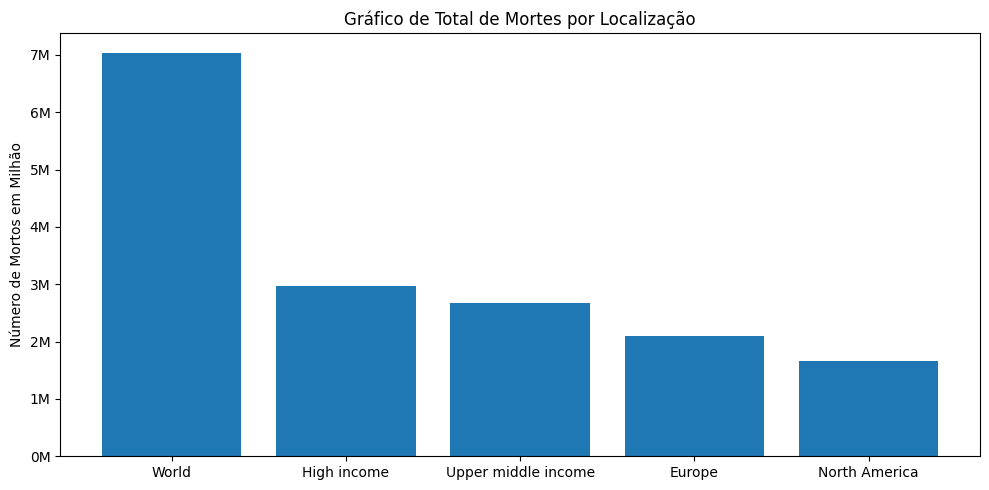

In [ ]:
# importar biblioteca matplotlib.ticker para formatar os rótulos do eixo
import matplotlib.ticker as ticker

# grafico de barras para total de mortes
top_total_deaths = df_new.loc[df_new.date == '2024-02-18', ['location', 'total_deaths']].sort_values(by='total_deaths', ascending=False)[0:5]


fig, ax = plt.subplots(figsize=(10,5))

ax.bar('location', 'total_deaths', data=top_total_deaths)


ax.set_title('Gráfico de Total de Mortes por Localização')
ax.set_ylabel("Número de Mortos em Milhão")


# Função para formatar o eixo y em milhões
def millions_formatter(x, pos):
    return '{:,.0f}M'.format(x / 1000000)

# Aplicar o formatador ao eixo y
ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

plt.tight_layout()
plt.show()

Agora outro gráfico de barras para melhorar a visualização referente ao número de casos.

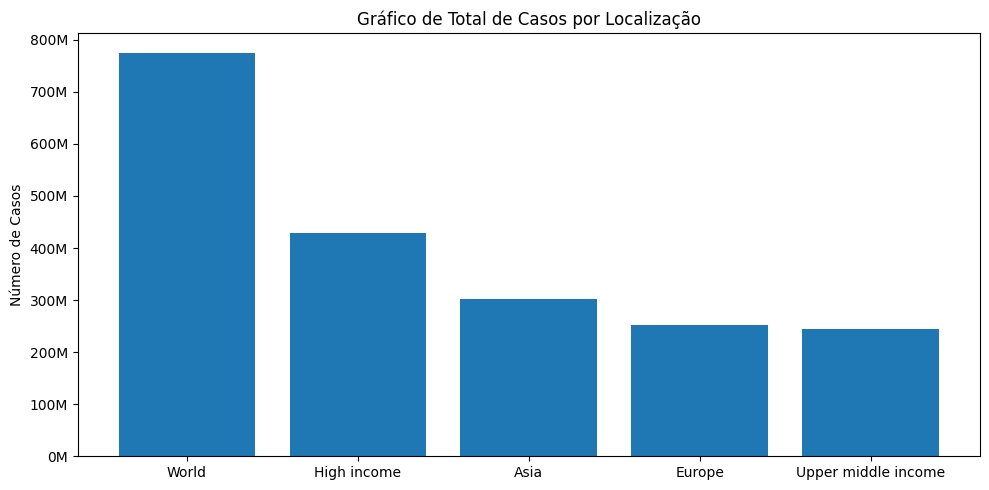

In [ ]:
# importar biblioteca matplotlib.ticker para formatar os rótulos do eixo
import matplotlib.ticker as ticker

# grafico de barras para total de casos
top_total_cases = df_new.loc[df_new.date == '2024-02-18', ['location', 'total_cases']].sort_values(by='total_cases', ascending=False)[0:5]


fig, ax = plt.subplots(figsize=(10,5))

ax.bar('location', 'total_cases', data=top_total_cases)


ax.set_title('Gráfico de Total de Casos por Localização')
ax.set_ylabel("Número de Casos")


# Função para formatar o eixo y em milhões
def millions_formatter(x, pos):
    return '{:,.0f}M'.format(x / 1000000)

# Aplicar o formatador ao eixo y
ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

plt.tight_layout()
plt.show()


Ao analisarmos os dois gráficos de barras, é evidente que os países desenvolvidos se destacam tanto em número de casos quanto em número de mortes em comparação aos países subdesenvolvidos. Essa discrepância levanta questões importantes em relação a vários aspectos, incluindo os contextos social, político e econômico de cada país.

Em termos sociais, essa disparidade pode refletir diferenças no acesso aos serviços de saúde, educação e informações sobre medidas preventivas. Países desenvolvidos geralmente possuem sistemas de saúde mais robustos e uma população mais educada sobre saúde pública, o que pode contribuir para uma melhor resposta à pandemia.

Do ponto de vista político, a capacidade de resposta do governo e as políticas implementadas também desempenham um papel crucial. Países com governos estáveis e recursos financeiros adequados podem ser mais capazes de implementar medidas de saúde pública eficazes, como testagem em massa, rastreamento de contatos e distribuição equitativa de vacinas.

Em termos econômicos, os impactos da pandemia podem ser mais severos nos países subdesenvolvidos, onde sistemas de saúde precários e altas taxas de pobreza podem dificultar a implementação de medidas de mitigação eficazes. Além disso, a pandemia pode agravar desigualdades socioeconômicas já existentes, com os mais vulneráveis sendo os mais afetados.

Portanto, ao analisar essas disparidades, é essencial considerar não apenas os números brutos de casos e mortes, mas também os contextos mais amplos que influenciam a resposta à pandemia em diferentes regiões do mundo. Essa análise pode fornecer insights valiosos para a formulação de políticas e estratégias de saúde pública mais eficazes e equitativas.

### Como o vírus está progredindo?

O avanço do vírus é uma das principais preocupações das autoridades de saúde em todo o mundo, pois afeta não apenas a saúde pública, mas também a economia e o bem-estar social.

Uma maneira eficaz de acompanhar a progressão da pandemia ao longo do tempo é através da análise de dados e gráficos. Um dos métodos mais utilizados para visualizar essa evolução é o gráfico de linhas, que nos permite observar as tendências e variações no número de casos e óbitos.

Vamos criar um gráfico de linha para ilustrar a trajetória das mortes em decorrência do vírus ao redor do mundo. Ao analisar esses dados de forma visual, podemos compreender melhor a magnitude e a velocidade com que o vírus está se espalhando e suas consequências na saúde global.

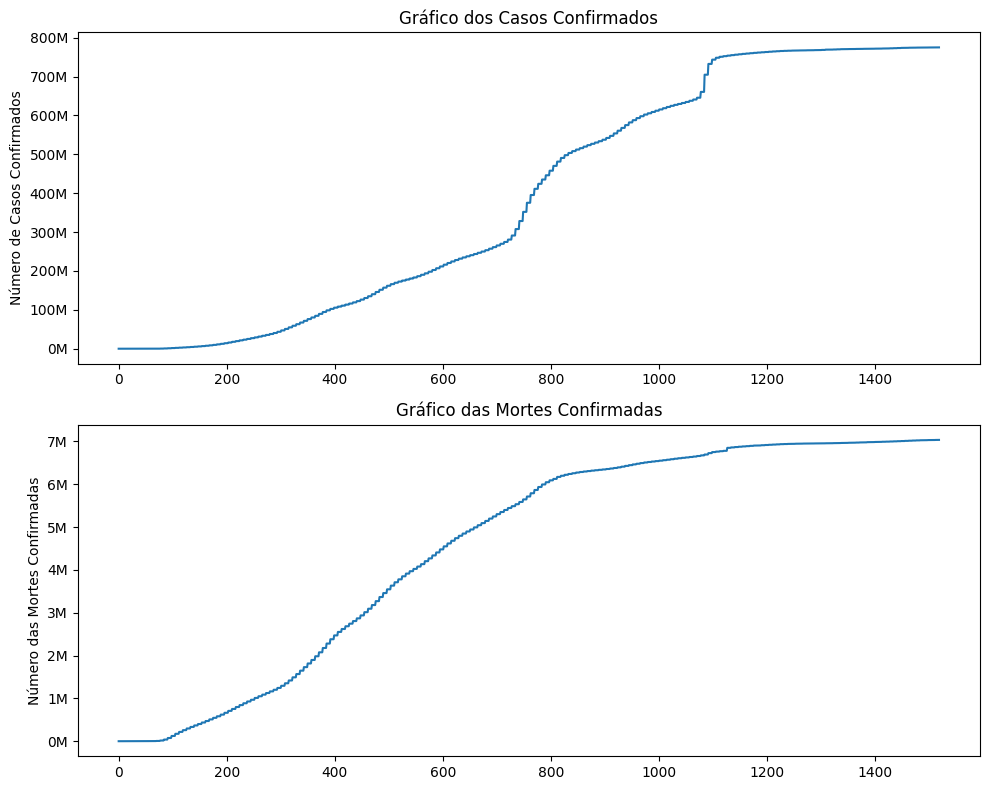

In [ ]:
# gráficos de linha para os números de casos e mortes pelo o mundo
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,8))

# Função para formatar o eixo y em milhões
def millions_formatter(x, pos):
    return '{:,.0f}M'.format(x / 1000000)

# Aplicar o formatador ao eixo y
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

# plotar número de casos
df_new.loc[df_new.location == 'World', 'total_cases'].reset_index(drop=True).plot(kind='line', ax=ax1)
ax1.set_title('Gráfico dos Casos Confirmados no Mundo')
ax1.set_ylabel("Número de Casos Confirmados no Mundo")

# plotar número de mortes
df_new.loc[df_new.location == 'World', 'total_deaths'].reset_index(drop=True).plot(kind='line', ax=ax2)
ax2.set_title('Gráfico das Mortes Confirmadas')
ax2.set_ylabel("Número das Mortes Confirmadas")

plt.tight_layout()

Ao examinarmos os dois gráficos de linhas, observamos um padrão consistente: no início da pandemia, o número de casos e mortes por COVID-19 aumentou significativamente. No entanto, após cerca de 1000 dias, houve uma desaceleração notável no crescimento desses números. Isso pode ser atribuído ao início da vacinação contra o COVID-19.

A introdução das vacinas contra o COVID-19 desempenhou um papel crucial na mudança dessa tendência. À medida que mais pessoas foram vacinadas, especialmente aquelas em grupos de maior risco e em áreas com alta transmissão, a propagação do vírus foi gradualmente contida. As vacinas ajudaram a reduzir a gravidade das infecções, prevenir hospitalizações e salvar vidas.

Além disso, medidas de saúde pública, como distanciamento social, uso de máscaras e restrições de viagens, também contribuíram para a diminuição do número de casos e mortes.

### Análise Exploratória para o Brasil

Após fazer uma análise dos acontecimentos no mundo, vamos vamso focar nos acontecimentos no Brasil.

In [ ]:
df_brasil = df.loc[df.location == "Brazil"].copy()

df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
45634,BRA,South America,Brazil,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
45635,BRA,South America,Brazil,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
45636,BRA,South America,Brazil,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
45637,BRA,South America,Brazil,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
45638,BRA,South America,Brazil,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN


Para ter uma noção do COVID-19 no Brasil, vamos verificar quando foram indentificados o primeiro caso e a primeira morte no Brasil.

Vamos verificar através das colunas `new_deaths` e `new_deaths`, pois as suas contagens podem incluir mortes e casos prováveis, quando relatadas, e assim fica mais facil de verificar quando foi a primeira morte e o primeiro caso relatado confirmado.

In [ ]:
# Identificar quando foi registrada a primeira morte no Brasil
df_brasil.loc[df_brasil['new_deaths'] != 0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
45711,BRA,South America,Brazil,2020-03-22,904.0,820.0,117.143,11.0,11.0,1.571,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN


In [ ]:
# identificação do primeiro caso
df_brasil.loc[df_brasil['new_cases'] != 0.0].head(1)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
45690,BRA,South America,Brazil,2020-03-01,1.0,1.0,0.143,NaN,0.0,0.0,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN


In [ ]:
print('O primeiro caso foi registrado em {}'.format(df_brasil.date.loc[45309]))
print('A primeira morte foi registrada em {}'.format(df_brasil.date.loc[45330]))

O primeiro caso foi registrado em 2020-03-01 00:00:00
A primeira morte foi registrada em 2020-03-22 00:00:00


Com as informações analisadas acima, temos:
* O primeiro caso de COVID-19 no Brasil foi registrado em **01 de Março de 2020**
* A primeira morte pela COVID-19 no Brasil foi registrado em **22 de Março de 2020**

Através disso podemos analisar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.

In [ ]:
# calculando tempo desde o primeiro caso até a primeira morte
delta = df_brasil.date.loc[45330] - df_brasil.date.loc[45309]
print('Se passaram {} dias entre o primeiro caso e a primeira morte no Brasil'.format(delta.days))

Pode-se ver que se passaram 21 dias entre o primeiro caso e a primeira morte no Brasil.

Depois desses 21 dias, o número de casos e mortes aumentaram exponencialmente, como podemos ver através dos gráficos que irei plotar abaixo.

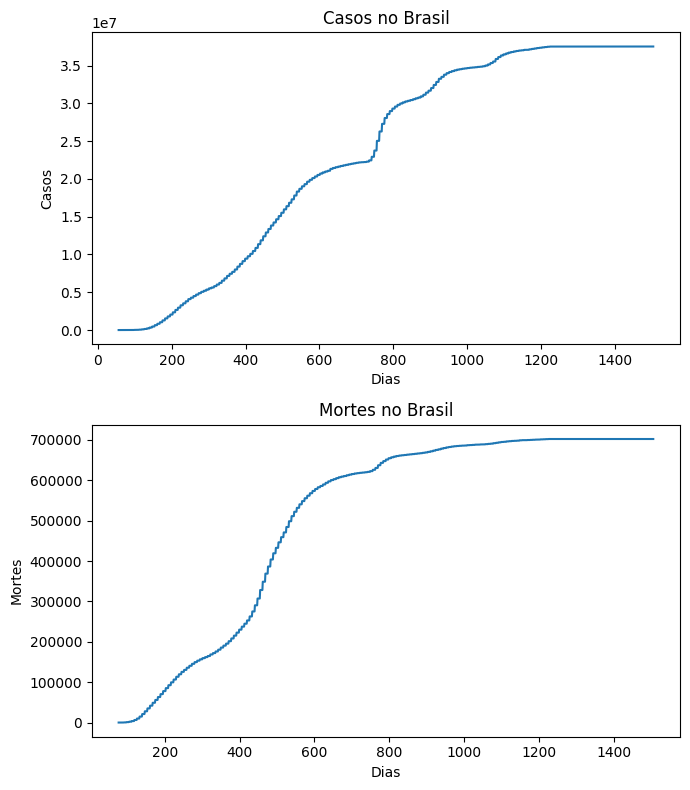

In [ ]:
# Plotar gráficos de linha em escalas linear para os casos totais e mortes totais.
fig, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(7,8))

df_brasil['total_cases'].reset_index(drop=True).plot(kind='line', ax=ax1)
ax1.set_title("Casos no Brasil")
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')
# ax1.set_xlim(21, 200)

df_brasil['total_deaths'].reset_index(drop=True).plot(kind='line', ax=ax2)
ax2.set_title("Mortes no Brasil")
ax2.set_xlabel('Dias')
ax2.set_ylabel('Mortes')
# ax2.set_xlim(21,200)


plt.tight_layout()

In [ ]:
# verificar a ultima data lançada referente ao Brasil
df_brasil.date.max()

Timestamp('2024-03-03 00:00:00')

In [ ]:
# total de mortes e casos no Brasil
df_brasil.loc[df.date == '2024-03-03']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
47152,BRA,South America,Brazil,2024-03-03,37519960.0,0.0,0.0,702116.0,0.0,0.0,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN


A análise dos números de casos e mortes no Brasil em 3 de Março de 2024 revela o seguinte:

* Havia um total de 37.519.960 casos confirmados e 702.116 mortes confirmadas.
* A população total era de 215.313.504 pessoas.

Ao relacionarmos esses números com a população total, obtemos as seguintes proporções:

* Os 37.519.960 casos confirmados representam 17.43% da população total.
* As 702.116 mortes confirmadas representam 0.33% da população total.

Além disso, observamos que o número de mortes representa 1.87% do número total de casos confirmados.

Os gráficos de linhas do número de casos e mortes no Brasil mostram um padrão semelhante aos gráficos de linhas globais. No início da pandemia, houve um aumento significativo no número de casos e mortes por COVID-19, seguido por uma desaceleração no crescimento desses números devido a medidas de saúde pública, como distanciamento social, uso de máscaras e restrições de viagens, além da campanha de vacinação em curso.

Como o Brasil é classificado como um país subdesenvolvido, podemos comparar seus números com os números dos países subdesenvolvidos como um todo. Dos dados citados sobre os países subdesenvolvidos:

* Foram contabilizadas 2.666.084 mortes e 245.387.262 casos.
* O número de mortes no Brasil representa 26.34% do número de mortes nos Países Subdesenvolvidos.
* O número de casos no Brasil representa 15.31% do número de casos nos Países Subdesenvolvidos.

Essa comparação destaca o impacto significativo da pandemia no Brasil em relação aos outros países subdesenvolvidos, ressaltando a necessidade contínua de medidas eficazes de saúde pública e aceleração da campanha de vacinação.

## Conclusão

Este projeto de data science ofereceu uma análise abrangente dos números de casos e mortes por COVID-19, com foco especial no Brasil, em 3 de Março de 2024. Os resultados obtidos revelam a gravidade da situação no país e destacam a importância de medidas eficazes de saúde pública e de aceleração da campanha de vacinação para mitigar os impactos da pandemia.

Observou-se que, até essa data, o Brasil havia registrado um total de 37.519.960 casos confirmados e 702.116 mortes confirmadas, representando 17.43% e 0.33% da população total, respectivamente. Além disso, a proporção de mortes em relação ao número total de casos confirmados foi de 1.87%.

Ao comparar os números do Brasil com os dados dos países subdesenvolvidos como um todo, fica evidente que o país enfrentou um impacto significativo da pandemia, representando 26.34% das mortes e 15.31% dos casos nesse grupo.

A análise dos gráficos de linhas dos números de casos e mortes mostrou um padrão semelhante ao observado globalmente: um aumento inicial seguido por uma desaceleração no crescimento dos números, atribuída às medidas de saúde pública e à vacinação.

Esses resultados reforçam a necessidade contínua de esforços para conter a propagação do vírus e reduzir o número de casos e mortes. Estratégias como o fortalecimento do sistema de saúde, a promoção de medidas de prevenção e a ampliação do acesso à vacinação são fundamentais para enfrentar os desafios impostos pela pandemia.